In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [235]:
init = pd.read_csv('../locationData/time_wav5.csv', header=None).T
u7 = pd.read_csv('../locationData/unit7.csv')
u8 = pd.read_csv('../locationData/unit8.csv')
u13 = pd.read_csv('../locationData/unit13.csv')
u20 = pd.read_csv('../locationData/unit20.csv')

startTime = init.iloc[1][0]
endTime = init.iloc[1][1]
print(startTime, endTime)

236880 238080


In [236]:
u7['GPS_time']=u7['GPS_time']-startTime
u8['GPS_time']=u8['GPS_time']-startTime
u13['GPS_time']=u13['GPS_time']-startTime
u20['GPS_time']=u20['GPS_time']-startTime


In [237]:
sampFreq = 65501


u7snaps = pd.read_csv('../PeakTimeLocationData/Unit7PeakTimes.csv', header=None, names = ["dirtime", "reftime"])


u8snaps = pd.read_csv('../PeakTimeLocationData/Unit8PeakTimes.csv', header=None, names = ["dirtime", "reftime"])


u13snaps = pd.read_csv('../PeakTimeLocationData/Unit13PeakTimes.csv', header=None, names = ["dirtime", "reftime"])


u20snaps = pd.read_csv('../PeakTimeLocationData/Unit20PeakTimes.csv', header=None, names = ["dirtime", "reftime"])


In [238]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
time = u7['GPS_time']
xpos = u7['x']
ypos = u7['y']

In [239]:
tnew = np.linspace(0, 1200, num=1201)
xinter = interp1d(time, xpos, kind='nearest')
yinter = interp1d(time, ypos, kind='nearest')

### u7pos is an interpolation from 0 to 1000 
### u7test

In [240]:
u7 = u7[u7['GPS_time'] <= 1100]  
u8 = u8[u8['GPS_time'] <= 1100]  
u13 = u13[u13['GPS_time'] <= 1100]  
u20 = u20[u20['GPS_time'] <= 1100]  


In [242]:
u20

,GPS_time,x,y,depth
0,17.1814,-39.174529,720.140794,10.080321
1,29.1773,-40.470198,720.841834,10.060622
2,41.1761,-39.658986,722.557771,10.035999
3,53.1759,-41.249034,723.202585,10.021225
4,65.1765,-40.256504,723.710799,9.964591
5,89.1765,-43.986596,722.824241,9.819312
6,101.1794,-44.020130,725.663524,9.787301
7,113.1840,-44.617085,726.517621,9.787301
8,125.1771,-45.483789,726.444090,9.821774
9,149.1103,-46.531873,728.670357,10.008913


In [252]:
tnew = np.linspace(20, 1000, num=981)
u7pos = pd.DataFrame({'time':tnew, 'xpos':interp1d(u7['GPS_time'], u7['x'], kind='nearest')(tnew),
                      'ypos':interp1d(u7['GPS_time'], u7['y'], kind='nearest')(tnew)})

u8pos = pd.DataFrame({'time':tnew, 'xpos':interp1d(u8['GPS_time'], u8['x'], kind='nearest')(tnew),
                      'ypos':interp1d(u8['GPS_time'], u8['y'], kind='nearest')(tnew)})

u13pos = pd.DataFrame({'time':tnew, 'xpos':interp1d(u13['GPS_time'], u13['x'], kind='nearest')(tnew),
                      'ypos':interp1d(u13['GPS_time'], u13['y'], kind='nearest')(tnew)})

u20pos = pd.DataFrame({'time':tnew, 'xpos':interp1d(u20['GPS_time'], u20['x'], kind='nearest')(tnew),
                      'ypos':interp1d(u20['GPS_time'], u20['y'], kind='nearest')(tnew)})

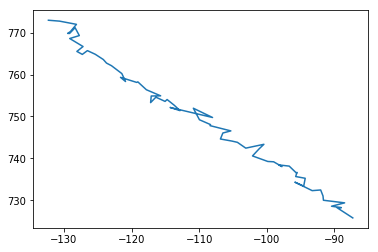

In [249]:
plt.plot(u7pos['xpos'], u7pos['ypos'])
plt.show();

In [264]:
u7snaps['dirtimer'] = u7snaps['dirtime'].round()
u7snaps = u7snaps.loc[:, ['dirtime', 'dirtimer']];
print(len(u7snaps))
print(len(u7pos))
u7postime = u7pos.iloc[u7snaps[u7snaps['dirtimer'] < 1000]['dirtimer']]

u8snaps['dirtimer'] = u8snaps['dirtime'].round()
u8snaps = u8snaps.loc[:, ['dirtime', 'dirtimer']];
u8postime = u8pos.iloc[u8snaps[u8snaps['dirtimer'] < 1000]['dirtimer']]

u13snaps['dirtimer'] = u13snaps['dirtime'].round()
u13snaps = u13snaps.loc[:, ['dirtime', 'dirtimer']];
u13postime = u13pos.iloc[u13snaps[u13snaps['dirtimer'] < 1000]['dirtimer']]

u20snaps['dirtimer'] = u20snaps['dirtime'].round()
u20snaps = u20snaps.loc[:, ['dirtime', 'dirtimer']];
u20postime = u20pos.iloc[u20snaps[u20snaps['dirtimer'] < 1000]['dirtimer']]

344
981


IndexError: positional indexers are out-of-bounds

In [262]:
direct = pd.DataFrame()

direct['u7dir'] = u7snaps[u7snaps['dirtimer'] < 1000]['dirtime']
direct['u8dir'] = u8snaps[u8snaps['dirtimer'] < 1000]['dirtime']
direct['u13dir'] = u13snaps[u13snaps['dirtimer'] < 1000]['dirtime']
direct['u20dir'] = u20snaps[u20snaps['dirtimer'] < 1000]['dirtime']

dirdiff = pd.DataFrame()
dirdiff['7-8'] = direct['u7dir']-direct['u8dir']
dirdiff['7-13'] = direct['u7dir']-direct['u13dir']
dirdiff['7-20'] = direct['u7dir']-direct['u20dir']
dirdiff['8-13'] = direct['u8dir']-direct['u13dir']
dirdiff['8-20'] = direct['u8dir']-direct['u20dir']
dirdiff['13-20'] = direct['u13dir']-direct['u20dir']

dirdiff.insert(0, "time", u7snaps['dirtimer'])


KeyError: 'dirtimer'

In [263]:
def getPosAtTime(t):
    u7p = [u7postime.loc[u7postime['time']==t]['xpos'],u7postime.loc[u7postime['time']==t]['ypos']]
    u8p = [u8postime.loc[u8postime['time']==t]['xpos'],u8postime.loc[u8postime['time']==t]['ypos']]
    u13p = [u13postime.loc[u13postime['time']==t]['xpos'],u13postime.loc[u13postime['time']==t]['ypos']]
    u20p = [u20postime.loc[u20postime['time']==t]['xpos'],u20postime.loc[u20postime['time']==t]['ypos']]
    #print([u7p, u8p, u13p, u20p])
    return [u7p, u8p, u13p, u20p]

#getTimeDiff at signal specified at second s
def getTimeDiffAtTime(t):
    return dirdiff.loc[dirdiff['time']==t].values[0][1:7]


In [ ]:
getPosAtTime(108)
getTimeDiffAtTime(108)

In [ ]:
def getDiffFromShrimp(shrimpPos):
    diff = [[0,0],[0,0],[0,0],[0,0]]
    for i in range(len(auvPos)):
        #print(shrimpPos[0])
        #print(auvPos[i][0])
        #print(shrimpPos[0])

        diff[i] = [float(shrimpPos[0] - auvPos[i][0]),float(shrimpPos[1] - auvPos[i][1])];
        
        
    return diff


def loss(s):
    error = np.zeros(6)
    k = 0
    diff = getDiffFromShrimp(s)
    for i in range(4):
        for j in range(i+1,4):
            #print(i,j)
            error[k] = timediff[k]-(np.linalg.norm(diff[i])-np.linalg.norm(diff[j]))
            k = k+1
    return error


In [ ]:
print((u7postime.loc[u7postime['time']==69]['xpos']))

In [ ]:
from scipy.optimize import least_squares
plt.plot(u7pos['xpos'], u7pos['ypos'])
co=0

for i in dirdiff['time']:
    #print(auvPos)
    auvPos = getPosAtTime(i)
    #print(auvPos)
    timediff = getTimeDiffAtTime(i)
    try:
    #shrimp location estimate-100
        initial_estimates=[-100,-100]
        res = least_squares(loss, initial_estimates)
        #print(i)
        #print(res.x[1], res.x[0])
    except TypeError:
        continue
    #plt.scatter(auvPos[:,0],auvPos[:,1],c='b')
    co = co+10
    #plt.scatter(res.x[0],res.x[1],c=co)
    plt.scatter(auvPos[0][0],auvPos[0][1],c='b')
    plt.scatter(auvPos[1][0],auvPos[1][1],c='b')
    plt.scatter(auvPos[2][0],auvPos[2][1],c='b')
    plt.scatter(auvPos[3][0],auvPos[3][1],c='b')
#    plt.xlim(-5000,100)
plt.show()

    

In [ ]:
auvPos

In [ ]:
dirdiff

In [ ]:
auvPos = getPosAtTime(6)
auvPos[0][0]
auvPos[0][1]

In [ ]:
i = 31
auvPos = getPosAtTime(i)
    #print(auvPos)
timediff = getTimeDiffAtTime(i)

initial_estimates=[-1000,-1000]
for i in range(-1000, 0, 250):
    for j in range(-1000, 0, 250):
        init =  [i,j];
        res = least_squares(loss, init)

        #plt.scatter(res.x[0],res.x[1],c='r')
        plt.scatter(auvPos[0][0],auvPos[0][1],c='b')
        plt.scatter(auvPos[1][0],auvPos[1][1],c='b')
        plt.scatter(auvPos[2][0],auvPos[2][1],c='b')
        plt.scatter(auvPos[3][0],auvPos[3][1],c='b')

plt.show();
print(res)

In [ ]:
float(diff[1][0])

In [ ]:
print(dirdiff)

In [ ]:
for i in dirdiff['time']:
    print(i)